### Imports Dependency

In [15]:
# Using Qiskit
import qiskit 
import qiskit.visualization
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display as disp , Latex

----
# Basic Parameterized Circuit for Quantum Machine Learning
----

#### General Term of Rotational Gate
$$
\mathcal{U}_{(X,Y,Z)} (\theta,\phi, \lambda) = \begin{pmatrix}
\cos(\theta/2)   &  -e^{j\lambda}\sin(\theta/2)\\
e^{j\phi}\sin(\theta/2)  &  e^{j(\lambda+\phi)}\cos(\theta/2)
\end{pmatrix}
$$


$$R_X(\theta \; ; \lambda=\frac{\pi}{2}, \phi=-\frac{\pi}{2})=
R_X(\theta) = \begin{pmatrix}
\cos(\theta/2)&-j\sin(\theta/2)\\
-j\sin(\theta/2)&-\cos(\theta/2)
\end{pmatrix}$$

$$R_Y(\theta \;; \lambda=0, \phi=0)=
R_Y(\theta) = \begin{pmatrix}
\cos(\theta/2)&-\sin(\theta/2)\\
\sin(\theta/2)&-\cos(\theta/2)
\end{pmatrix}$$

$$R_Z(\phi \;;\theta = 0, \lambda=0)=
R_Z(\phi) = \begin{pmatrix}
e^{-j(\phi/2)} & 0\\
0 & e^{j(\phi/2)}
\end{pmatrix}
$$



### Parameterized Quantum Circuit

1. $rx(\theta)$
2. $ry(\theta)$
3. $rz(\theta)$

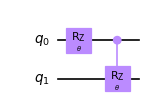

In [2]:
# let theta is our parameter 
theta = qiskit.circuit.Parameter('$\\theta$')
# create circuit
qcircuit = qiskit.circuit.QuantumCircuit(2)
# appling rz gate with theta parameter on 0 th qubit
qcircuit.rz(theta, 0)
# appling crz gate with theta parameter on 1 th qubit
qcircuit.crz(theta, 0, 1) # control bit is 0
qcircuit.draw(scale=.6)


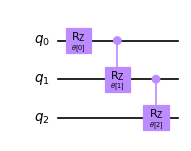

In [3]:
 # let theta is our parameter lis
theta = qiskit.circuit.ParameterVector('$\\theta$', length= 3)
# create circuit
qcircuit2 = qiskit.circuit.QuantumCircuit(3)
# appling rz gate with theta parameter on 0 th qubit
qcircuit2.rz(theta[0], 0)
# appling crz gate with theta parameter on 1 th qubit
qcircuit2.crz(theta[1], 0, 1) # control bit is 0
# appling crz gate with theta parameter on 1 th qubit
qcircuit2.crz(theta[2], 1, 2) # control bit is 1
qcircuit2.draw(scale =.6)

#### Visualization Tool

In [4]:

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]



   
q: 
   


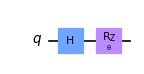

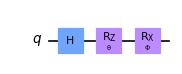

In [5]:
# First, we need to define the circuits:
theta = qiskit.circuit.Parameter('θ')
phi = qiskit.circuit.Parameter('Φ')
# Circuit A
qc_A = qiskit.circuit.QuantumCircuit(1)
print(qc_A)
print(qc_A.h(0))
qc_A.rz(theta, 0)
disp(qc_A.draw(scale=.6))
# Circuit B
qc_B = qiskit.circuit.QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta, 0)
qc_B.rx(phi, 0)
disp(qc_B.draw(scale=.6))
# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta_i = 2*np.pi*np.random.uniform(size=num_param) 
phi_i = 2*np.pi*np.random.uniform(size=num_param) 

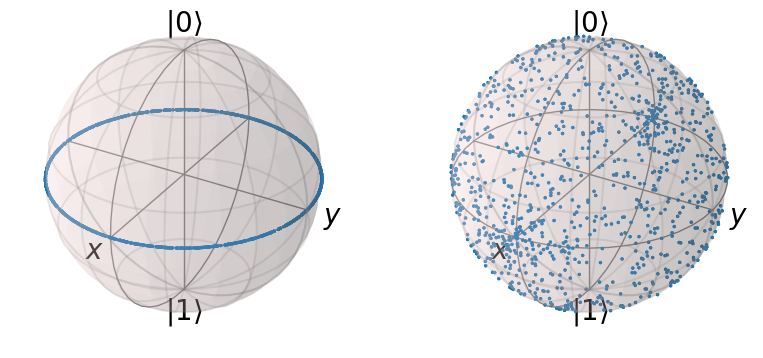

In [6]:
# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta:theta_i[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta:theta_i[i], phi:phi_i[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

In [7]:
state_1

Statevector([-0.37350941-0.6004088j, -0.37350941+0.6004088j],
            dims=(2,))


## Predefined Parameterized quantum circuits for machine learning

In quantum machine learning, parameterized quantum circuits tend to be used for two things:

* To encode data, where the parameters are determined by the data being encoded
* As a quantum model, where the parameters are determined by an optimization process.

Here we will give some examples of how to build parameterized quantum circuits used in the quantum machine learning literature using Qiskit.

##### $$\Large{u}_{\normalsize{\Phi(x)}} = \normalsize{ \prod\limits_{d}U_{\Phi(x)} H^{\otimes n}} , U_{\Phi(x)} = \exp\left( i\sum\limits_{S\subseteq[n]}\phi_{s}(x)\prod\limits_{k\in S}P_i \right)$$

which contains layers of Hadamard gates interleaved with entangling blocks, $U_{\Phi(x)}$. This unitary was chosen because it is classically difficult to compute, but tractable on near term hardware. Within the entangling blocks, $U_{\Phi(x)}:P_i \in \{ I,X,Y,Z\}$ denotes the Pauli matrices, the index $S$ describes connectivity between different qubits $: S \in \left( \begin{matrix}n\\k \end{matrix}\right) \text{for} \; k = 1(1)n$ and data mapping function $\phi_s(x)$ is $$\phi_s:x\mapsto \begin{cases}x_i & \text{ if } s= \{i\} \\ (\pi-x_i)(\pi-x_j) & \text{ if } s= \{i,j\} \end{cases}$$

### ZZFeatureMap

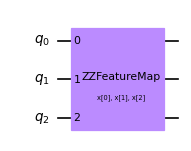

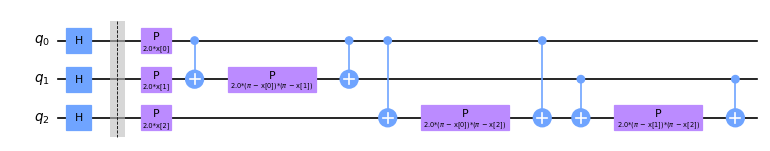

In [8]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
decomposed_circuit = qc_zz.decompose()
f1 = qc_zz.draw(scale=.6)
f2 = decomposed_circuit.draw(scale=.6)
disp(f1,f2)

### TwoLocal

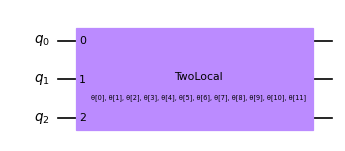

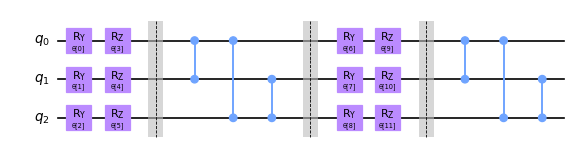

In [9]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

decomposed_twoLocal = qc_twolocal.decompose()
f1 = qc_twolocal.draw(scale=.6)
f2 = decomposed_twoLocal.draw(scale=.6)
disp(f1,f2)

### NLocal

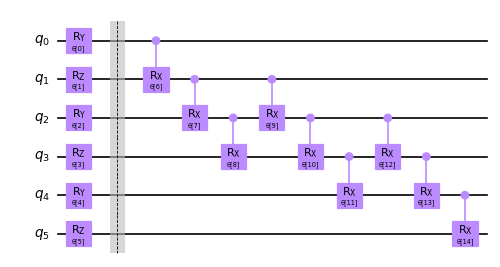

In [10]:
from qiskit.circuit.library import NLocal

# rotation block:
rot = qiskit.circuit.QuantumCircuit(2)
params =  qiskit.circuit.ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent =  qiskit.circuit.QuantumCircuit(4)
params = qiskit.circuit.ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw(scale=.6)

----- 
# Data Encoding For Quantum Machine Learning
------

#### Availabel Data coding technique are 
1. Basis Encoding
2. Amplituted Encoding
3. Angle encoding
4. Higher order Encoding 

## 1. Basis Encoding 

$\mathscr{X}$ is $M$ valued data set each eith $N$ features<br> 
$\mathscr{X} =  \{x^{(1)},...,x^{(i)},...,x^{(M)}\}$ ; <br>
where $x^{(i)}$ is binary representation of $i^{th}$ number <br>
$x^{(i)}=[x_1x_2....x_N]$ where $x_j \in \{0,1\}$ for $j=1(1)N$

By applying concept of superposition $\mathscr{X}$ can express as  $|{\mathscr{X}}\rangle = \frac{1}{\sqrt{M}}\sum\limits_{i=1}^{M}|x^{(i)}\rangle$ 

### Basic Datasets 

In [5]:
N_bit = 4

In [6]:
data = np.random.randint(0,15,16)
data


array([ 0,  3,  7,  7,  4,  3,  0, 12,  4,  0, 14, 10,  3,  7, 12,  4])

In [8]:
flatten_data = data.flatten()

In [9]:
def basis_encode(dataset:np.ndarray, n_bit=N_bit):
    d2=dataset.flatten()
    l=[np.zeros(d2.shape) for i in range(n_bit)]
    for j in range (len(l)):
        for i in range(len(d2)) :
            l[j][i]= np.binary_repr(d2[i],width = n_bit)[j]
        l[j] = l[j].reshape(dataset.shape)
    encoded_array = np.squeeze(np.dstack(l))
    return (encoded_array)
basis_encode(data)

array([[0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 1., 1., 1.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [16]:
encoded_data = basis_encode(data)
encoded_vector = encoded_data.sum(axis =0)
encoded_normalized_vector = encoded_vector / np.linalg.norm(encoded_vector)
encoded_normalized_vector

array([0.2849882 , 0.64122345, 0.5699764 , 0.4274823 ])

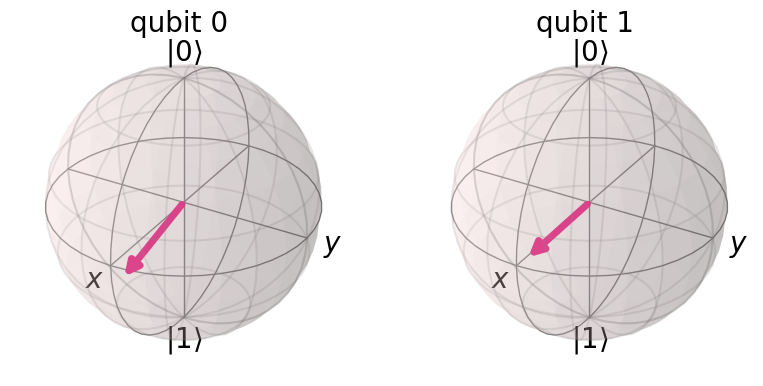

In [17]:
qiskit.visualization.plot_bloch_multivector(encoded_normalized_vector, figsize=(4,4))

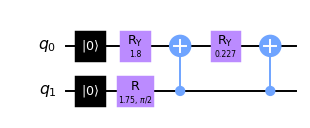

In [105]:
N_qbit = int(np.log2(N_bit))
qc = qiskit.circuit.QuantumCircuit(N_qbit)
qc.initialize(encoded_normalized_vector,range(N_qbit))
qc.draw()
qc.decompose().decompose().decompose().decompose().decompose().draw(scale=.7)

## 2. Amplituted Encoding

Amplitude encoding encodes data into the amplitudes of a quantum state. <br>
It represents a normalised classical $N$-dimensional data point,$x$, as the amplitudes of a $n$-qubit quantum state, $|\psi_{x}\rangle$
:
$$|\psi_{x}\rangle = \sum\limits_{i=1}^{N}x_i|i\rangle \;\;;\;\;\text{where}\;N=2^n$$


In [74]:
dataset = np.random.normal(loc = 20, scale = 9, size=(12,80))
dataset.shape

(12, 80)

### Encoding dataset

In [75]:
flatten_data = dataset.flatten()
N = len(flatten_data)
disp(N)
# Determine no of qubit system to represent the system 
n_qubits = int(np.log2(N))+1
disp(n_qubits)


960

10

In [76]:
padding_shape = (int((2**n_qubits - len(flatten_data))/2),)
state_vector =  np.pad(flatten_data,padding_shape,constant_values=0)
normalised_factor = np.linalg.norm(state_vector)
normalized_vector = state_vector/normalised_factor

In [77]:
qc = qiskit.circuit.QuantumCircuit(n_qubits)
qc.initialize(normalized_vector, range(n_qubits))

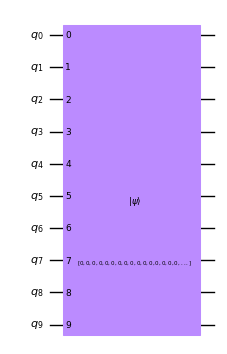

In [78]:
qc.draw(scale=.5,fold=False)

## 3. Angle encoding

In [82]:
data = np.random.normal(10,4,(5,))
data
n_qubits = len(data)

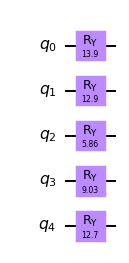

In [85]:
qc = qiskit.circuit.QuantumCircuit(n_qubits)
for i in range(n_qubits):
    qc.ry(data[i],i)
qc.draw(scale = .7)

## 4. Higher order Encoding 